#SENTIMENT ANALYSIS OF ONLINE PRODUCT REVIEWS USING BERT

#1. Install and Import Dependincies

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
df = pd.read_csv('/content/Reviews.csv',encoding='cp1252')
df = df.tail(1000)

In [ ]:
list(df)

['id', 'product', 'title', 'rating', 'reviewText']

In [ ]:
df.tail()

,id,product,title,rating,reviewText
95,95,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nAll great except camera,4,"I like the phone. It has a good processor, the..."
96,96,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",3.0 out of 5 stars\nGood product this price,3,Good product this price
97,97,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nOverall good phone,4,Using it from last 3 months now. Battery backu...
98,98,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nGood,4,"Nice phone, smooth touch"
99,99,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nMissing accessories received,4,Providing review on product performance before...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          100 non-null    int64 
 1   product     100 non-null    object
 2   title       100 non-null    object
 3   rating      100 non-null    int64 
 4   reviewText  100 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.0+ KB


In [ ]:
#checking shape of data
print(df.shape)

(100, 5)


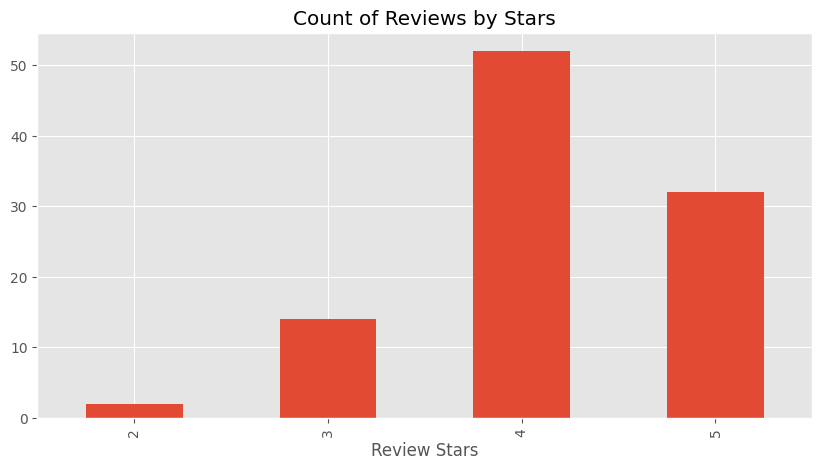

In [ ]:
#create bar plot from data
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))

ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
#Making NLP on 1 data
example = df['reviewText'][90]
print(example)

Good one display is good battery life is very good camera quality is good for me finger printer placement is not good can't be used with both hands


In [ ]:
#tokenize the review
tokens = nltk.word_tokenize(example)
tokens[:10]

['Good',
 'one',
 'display',
 'is',
 'good',
 'battery',
 'life',
 'is',
 'very',
 'good']

In [ ]:
#search for pos
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Good', 'JJ'),
 ('one', 'CD'),
 ('display', 'NN'),
 ('is', 'VBZ'),
 ('good', 'JJ'),
 ('battery', 'NN'),
 ('life', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('good', 'JJ')]

In [ ]:
#put tagged review into entities
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Good/JJ
  one/CD
  display/NN
  is/VBZ
  good/JJ
  battery/NN
  life/NN
  is/VBZ
  very/RB
  good/JJ
  camera/NN
  quality/NN
  is/VBZ
  good/JJ
  for/IN
  me/PRP
  finger/JJR
  printer/NN
  placement/NN
  is/VBZ
  not/RB
  good/JJ
  ca/MD
  n't/RB
  be/VB
  used/VBN
  with/IN
  both/DT
  hands/NNS)


# VADER MODEL

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [ ]:
#implement sia in example
sia

In [ ]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'compound': 0.926}

In [ ]:
#str(['reviewText']).encode('utf-16')
#str(['id']).encode('utf-16')

In [ ]:
#run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['reviewText']
    myid = row['id']
    res[myid]= sia.polarity_scores(str(text))

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
#showing results
res

{0: {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.9682},
 1: {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.7003},
 2: {'neg': 0.342, 'neu': 0.658, 'pos': 0.0, 'compound': -0.5696},
 3: {'neg': 0.019, 'neu': 0.835, 'pos': 0.146, 'compound': 0.9924},
 4: {'neg': 0.063, 'neu': 0.629, 'pos': 0.308, 'compound': 0.9021},
 5: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404},
 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7: {'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'compound': 0.296},
 8: {'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.8399},
 9: {'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'compound': 0.8271},
 10: {'neg': 0.309, 'neu': 0.691, 'pos': 0.0, 'compound': -0.6923},
 11: {'neg': 0.216, 'neu': 0.571, 'pos': 0.212, 'compound': -0.0129},
 12: {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404},
 13: {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404},
 14: {'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'compound': 0.7269},
 15: {'n

In [ ]:
#saving vader results
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(df, how='left')

In [ ]:
# Now we have sentiment score and metadata
vaders.head()

,id,neg,neu,pos,compound,product,title,rating,reviewText
0,0,0.000,0.829,0.171,0.9682,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...","4.0 out of 5 stars\n""Redmi 11T 5G: Affordable ...",4,The Xiaomi Redmi Note 11 T 5G impresses with i...
1,1,0.000,0.707,0.293,0.7003,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nFunction not good,4,Phone is good but function are not . Finger pr...
2,2,0.342,0.658,0.000,-0.5696,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nCamera call record ing,4,Call recording is difficult and photos by c...
3,3,0.019,0.835,0.146,0.9924,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",5.0 out of 5 stars\nA Stellar Performer - Five...,5,The Redmi Note 11T is an absolute gem of a sma...
4,4,0.063,0.629,0.308,0.9021,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nNot wort the money,4,Best mobiles are available at cheaper price fo...


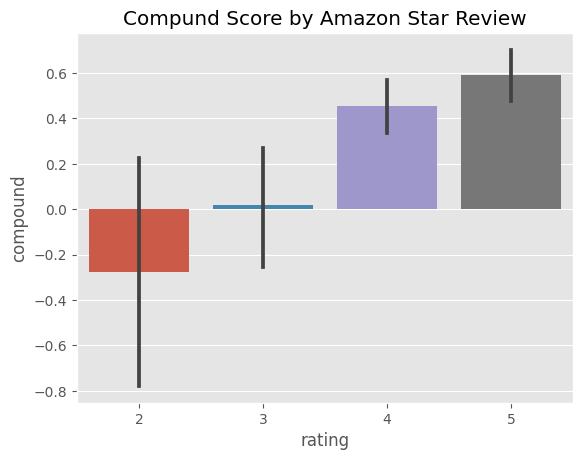

In [ ]:
#plot VADER Results
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

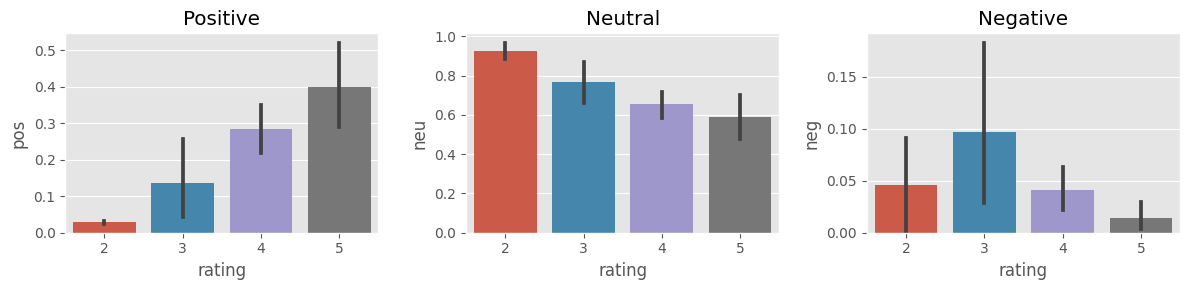

In [ ]:
#visualizing results
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Roberta Model

In [ ]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 120.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.9 MB/s eta 0:00:00


In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
#VADER results on example
print(example)
sia.polarity_scores(example)

Good one display is good battery life is very good camera quality is good for me finger printer placement is not good can't be used with both hands


{'neg': 0.0, 'neu': 0.613, 'pos': 0.387, 'compound': 0.926}

In [ ]:
#run roberta
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)



{'roberta_neg': 0.099778704, 'roberta_neu': 0.22275981, 'roberta_pos': 0.67746145}


In [ ]:
#run on entire dataset
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict



In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['reviewText']
        myid = row['id']
        vader_result = sia.polarity_scores(str(text))
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(str(text))
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
#visualize result dic
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'id'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df.head()

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,product,title,rating,reviewText
0,0,0.000,0.829,0.171,0.9682,0.001274,0.024563,0.974163,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...","4.0 out of 5 stars\n""Redmi 11T 5G: Affordable ...",4,The Xiaomi Redmi Note 11 T 5G impresses with i...
1,1,0.000,0.707,0.293,0.7003,0.670097,0.276089,0.053814,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nFunction not good,4,Phone is good but function are not . Finger pr...
2,2,0.342,0.658,0.000,-0.5696,0.681950,0.291841,0.026209,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nCamera call record ing,4,Call recording is difficult and photos by c...
3,3,0.019,0.835,0.146,0.9924,0.001871,0.028074,0.970055,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",5.0 out of 5 stars\nA Stellar Performer - Five...,5,The Redmi Note 11T is an absolute gem of a sma...
4,4,0.063,0.629,0.308,0.9021,0.151238,0.321754,0.527008,"Redmi Note 11T 5G (Matte Black, 6GB RAM, 128GB...",4.0 out of 5 stars\nNot wort the money,4,Best mobiles are available at cheaper price fo...


In [ ]:
results_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'product', 'title',
       'rating', 'reviewText'],
      dtype='object')

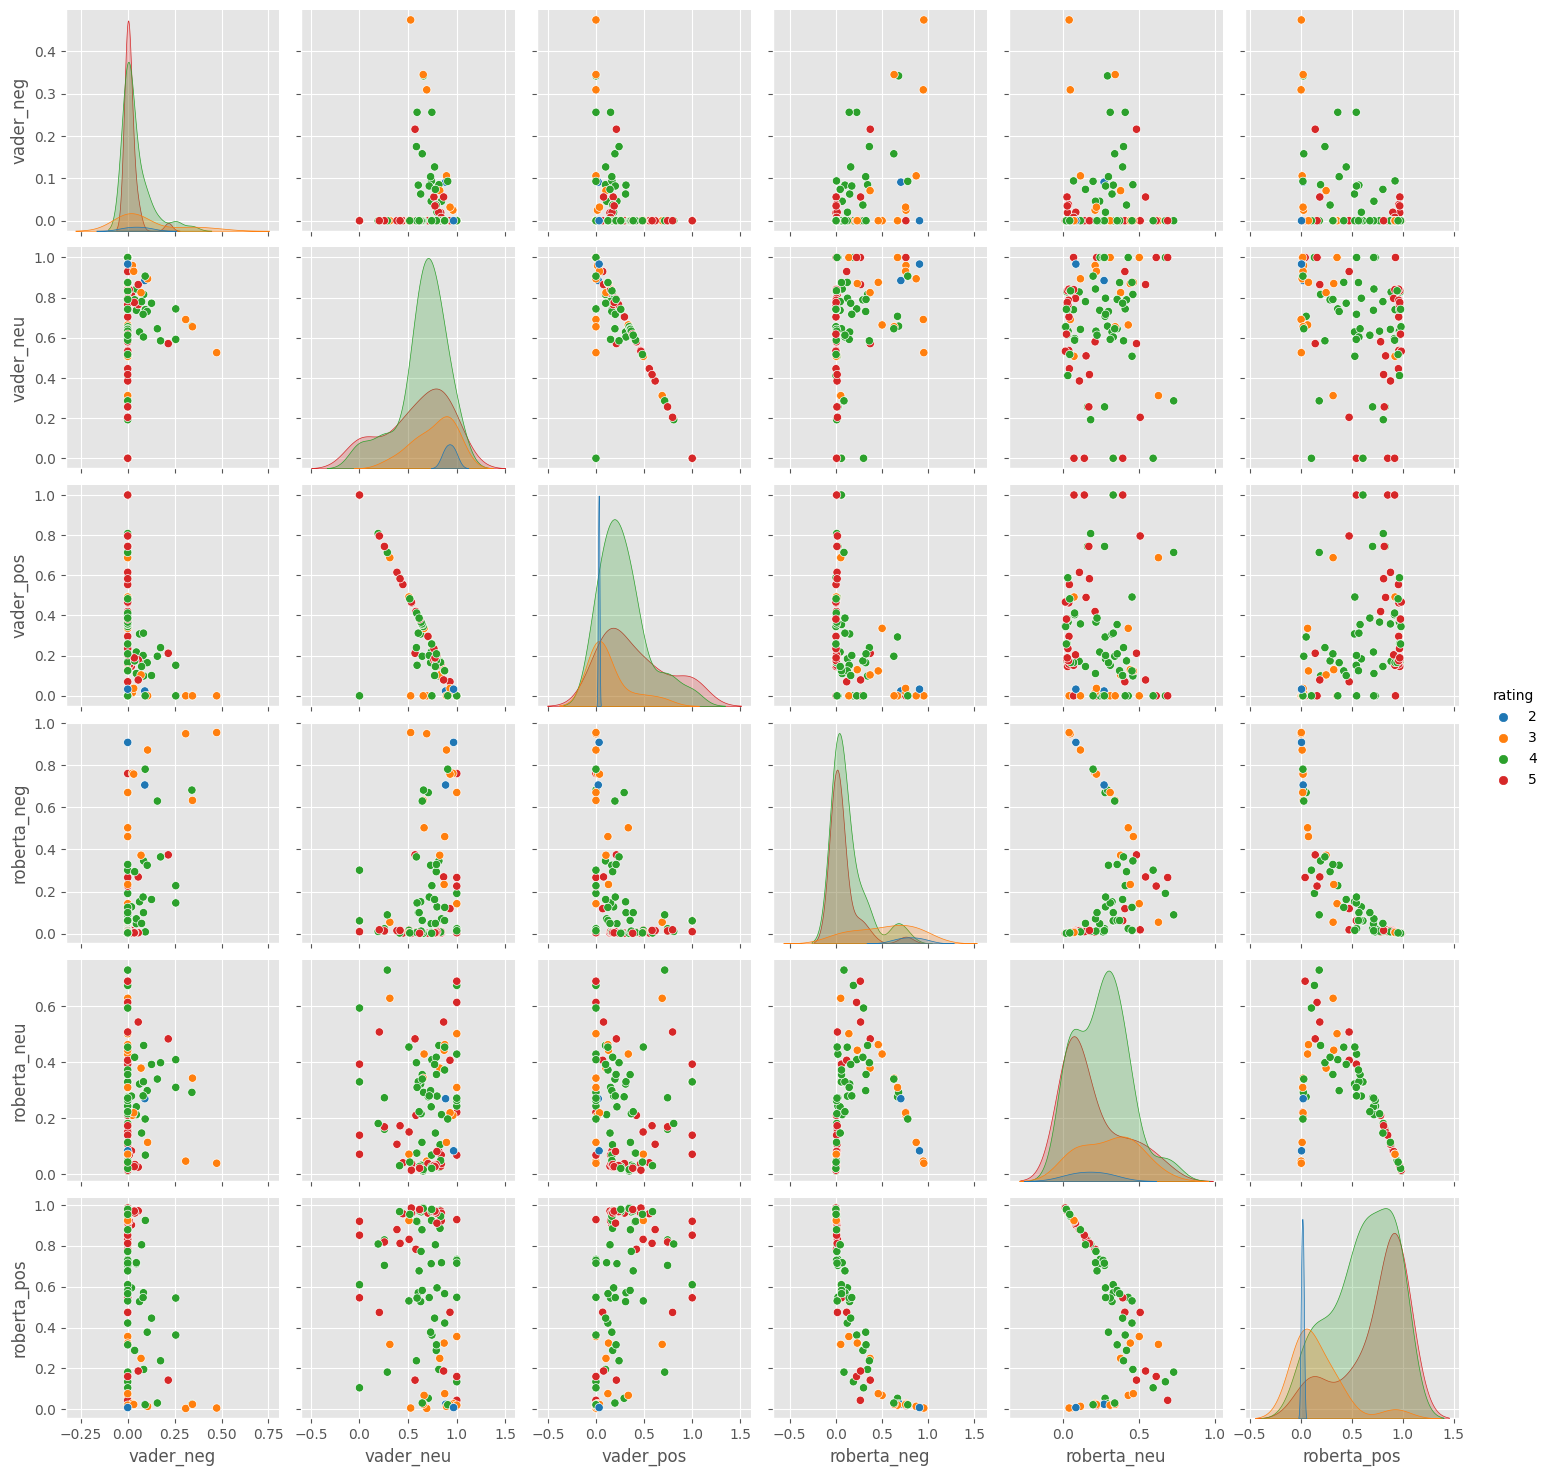

In [ ]:
sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos','roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

#Review

In [ ]:
#the most positive in star 1 review
results_df.query('rating == 2.0') \
    .sort_values('roberta_pos', ascending=False)['reviewText'].values[0]

"I am sharing this review and feedback after using it 10 months. Recent software update damaged it's motherboard completed and now service centre asked for INR 14,600 for changing  the motherboard as per them there has been leakage however there was liquid drop happened on the phone or it won't dropped/kept at any wet location.At same service centre found multiple customer who faced similar problems in very short span of used redmi phone (recently brought by them), it shows how much quality of product as dropped as product became no1 too early misusing it.I block now people should go with some other brands instead of redmi or Xiaomi products."

In [ ]:
#the most negative in star 1 review
results_df.query('rating == 2.0') \
    .sort_values('vader_pos', ascending=False)['reviewText'].values[0]

"Some issues with the software. Push notifications remains there for a very longer time, which is a headache as it's disppayed on the keypad. Then when a call comes if we open any other application Without attending the call, it's not possible to go back to the call and attend it while phone will be still ringing.Not worth the money."

In [ ]:
#negative sentiment 5-star view
results_df.query('rating == 5.0') \
    .sort_values('roberta_neg', ascending=False)['reviewText'].values[0]

'The media could not be loaded.\n                \n\n\n\n\xa0???? ????? ????? ?? ????? ????? ?????????? ??????'

In [ ]:
#the most positive in star 1 review
results_df.query('rating == 5.0') \
    .sort_values('vader_neg', ascending=False)['reviewText'].values[0]

'Mobile Design Is Best But Processor is low quality.'

#Huggingface transformers pipeline

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sent_pipeline(example)

[{'label': 'POSITIVE', 'score': 0.5020639896392822}]